# Keras

In [21]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, Nadam, Adagrad, RMSprop
from keras.utils import np_utils,normalize, to_categorical
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


### 데이터 구성

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

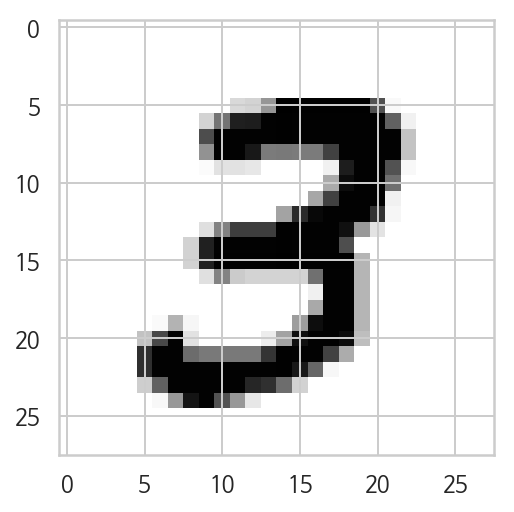

In [4]:
plt.imshow(X_train[7], cmap = plt.cm.binary)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train[7]

3

In [7]:
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

In [8]:
X_train[0].shape

(784,)

In [9]:
X_train = X_train/255
X_test = X_test/225

In [10]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
#모델 구성
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [13]:
#모델 학습 과정 설정
model.compile(loss='categorical_crossentropy', optimizer=Adam( ), metrics=['accuracy'])

In [14]:
#모델 학습
hist = model.fit(X_train, y_train,verbose=1, validation_split=0.1, epochs=10, batch_size=32,\
                 callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.2302 - acc: 0.9294 - val_loss: 0.0970 - val_acc: 0.9707
Epoch 2/10
54000/54000 [==============================] - 7s 124us/step - loss: 0.0927 - acc: 0.9711 - val_loss: 0.0814 - val_acc: 0.9772
Epoch 3/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0653 - acc: 0.9789 - val_loss: 0.0666 - val_acc: 0.9810
Epoch 4/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0477 - acc: 0.9848 - val_loss: 0.0734 - val_acc: 0.9790
Epoch 5/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.0373 - acc: 0.9877 - val_loss: 0.0702 - val_acc: 0.9798
Epoch 6/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0314 - acc: 0.9901 - val_loss: 0.0722 - val_acc: 0.9808
Epoch 7/10
54000/54000 [==============================] - 7s 131us/step - loss: 0.0276 - acc: 0.9908 - val_loss: 0.0651 - v

/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))


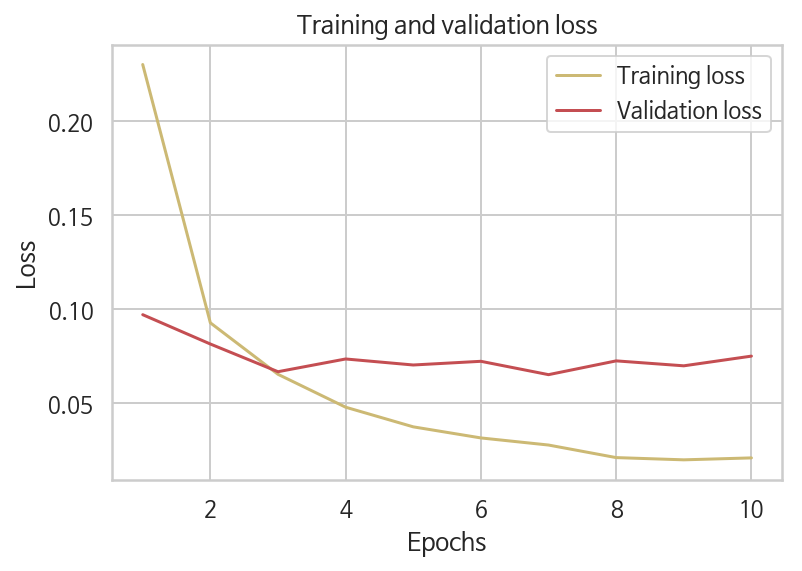

In [15]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

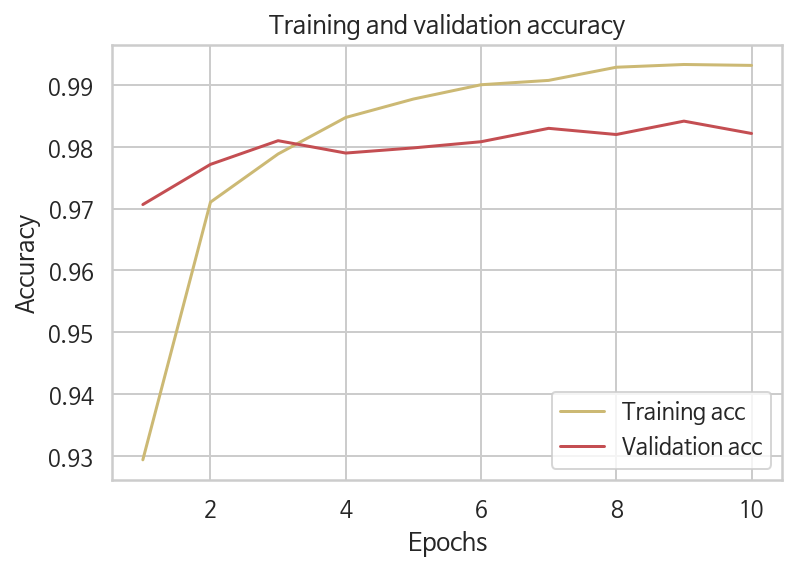

In [16]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#학습이력 출력
print('훈련 손실값: ', hist.history['loss'])
print('훈련 정확도: ', hist.history['acc'])

훈련 손실값:  [0.23021311649128243, 0.09267457422062203, 0.06525972160276164, 0.047745113152268995, 0.037282267019545005, 0.031377162573462423, 0.027594247399592185, 0.020908776501907766, 0.019717555525110113, 0.020747307048368385]
훈련 정확도:  [0.9293518518518519, 0.9710555555555556, 0.9788518518518519, 0.9847592592592592, 0.9877407407407407, 0.9900555555555556, 0.9907592592592592, 0.9928888888888889, 0.9933333333333333, 0.9931851851851852]


In [18]:
#모델을 평가
score = model.evaluate(X_test, y_test, verbose=1)
print('손실=', score[0])
print('정확도=', score[1])
print(score)

10000/10000 [==============================] - 0s 34us/step
손실= 0.06762936682261643
정확도= 0.9823
[0.06762936682261643, 0.9823]


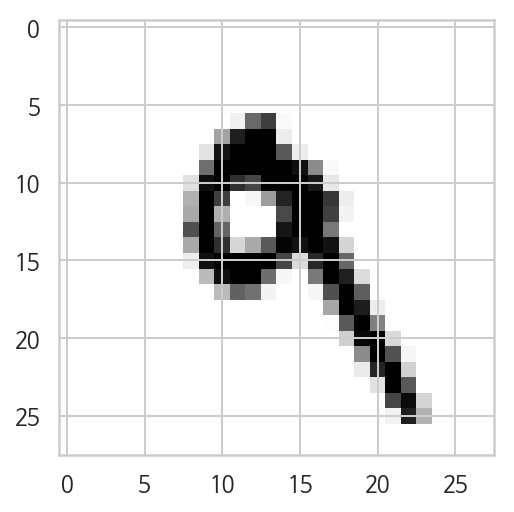

In [26]:
#모델을 사용하여 예측
x_store = X_test[7]
plt.imshow(x_store.reshape((28,28)),cmap = plt.cm.binary)

In [27]:
pre = model.predict(x_store)
print('## 예측 ##')
np.argmax(pre)

ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)

## BMI 데이터

In [52]:
csv = pd.read_csv("/Users/lesson6_mac/AtomData/python/bmi/bmi.csv")

In [53]:
csv.describe()

,height,weight
count,20000.000000,20000.000000
mean,159.927200,57.535000
std,23.342096,13.285259
min,120.000000,35.000000
25%,140.000000,46.000000
50%,160.000000,58.000000
75%,180.000000,69.000000
max,200.000000,80.000000


In [54]:
csv.head()

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat


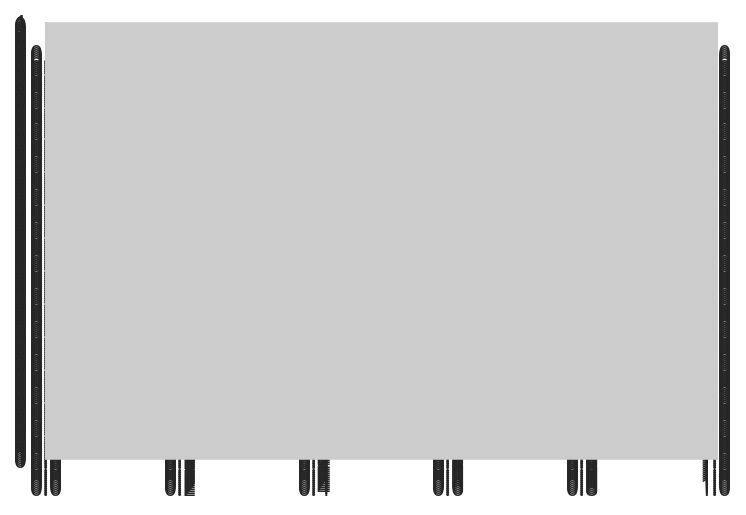

In [73]:
fig, axs =plt.subplots(211)
axs[0]
# axs[1].plot(csv['weight'])


In [4]:
csv['height'] = csv['height']/200
csv['weight'] = csv['weight']/80
csv.head()

,height,weight,label
0,0.710,0.7750,fat
1,0.710,0.9125,fat
2,0.885,0.7625,normal
3,0.935,0.6000,thin
4,0.765,0.7500,fat


In [16]:
X = csv[['height','weight']].values
X

array([[142,  62],
       [142,  73],
       [177,  61],
       ...,
       [193,  37],
       [195,  51],
       [163,  67]])

In [17]:
y = np.empty((20000,3))
y

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]
y[0]

array([0., 0., 1.])

In [19]:
X_train, y_train = X[1:15001], y[1:15001]
X_test, y_test = X[15001:20001], y[15001:20001]

In [22]:
#모델설정
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

In [23]:
#모델 학습 과정 설정
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [24]:
#모델 학습
hist = model.fit(X_train, y_train, batch_size=50, epochs=20,\
                 callbacks=[EarlyStopping(monitor='val_loss', patience=2)],\
                 validation_split=0.1, verbose=1, shuffle =True)

Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 74us/step - loss: 0.5308 - acc: 0.7490 - val_loss: 0.4868 - val_acc: 0.7620
Epoch 2/20
13500/13500 [==============================] - 1s 54us/step - loss: 0.4601 - acc: 0.7842 - val_loss: 0.4240 - val_acc: 0.7987
Epoch 3/20
13500/13500 [==============================] - 1s 52us/step - loss: 0.4289 - acc: 0.7969 - val_loss: 0.3728 - val_acc: 0.8173
Epoch 4/20
13500/13500 [==============================] - 1s 52us/step - loss: 0.3478 - acc: 0.8450 - val_loss: 0.2996 - val_acc: 0.8607
Epoch 5/20
13500/13500 [==============================] - 1s 51us/step - loss: 0.2634 - acc: 0.8890 - val_loss: 0.1815 - val_acc: 0.9520
Epoch 6/20
13500/13500 [==============================] - 1s 52us/step - loss: 0.2180 - acc: 0.9087 - val_loss: 0.1464 - val_acc: 0.9580
Epoch 7/20
13500/13500 [==============================] - 1s 52us/step - loss: 0.1951 - acc: 0.9139 - val_loss: 0.1448 - val_acc:

/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))


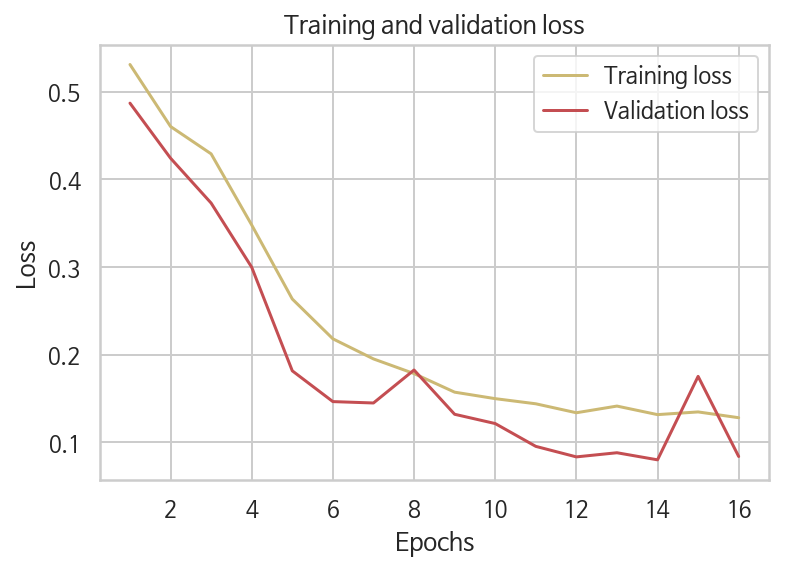

In [25]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

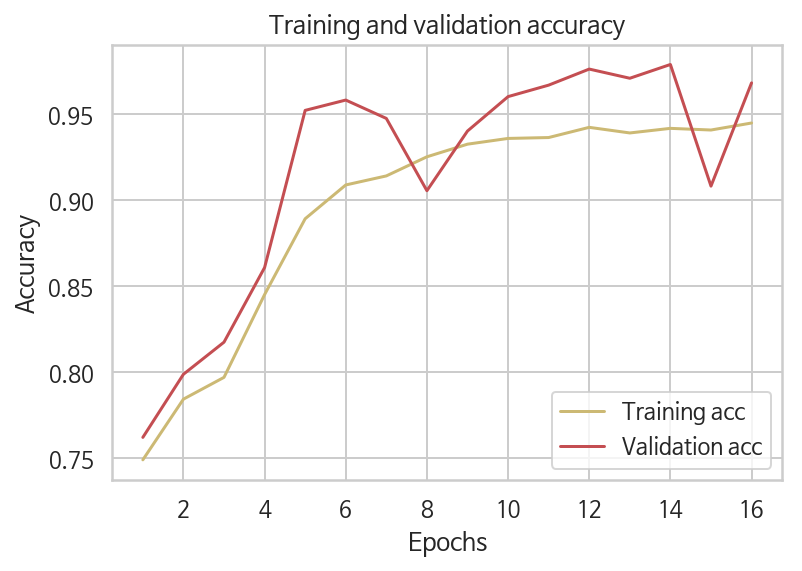

In [26]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
score = model.evaluate(X_test, y_test) 
print('손실=', score[0])
print('정확도=', score[1])

4999/4999 [==============================] - 0s 26us/step
손실= 0.0897847363789765
정확도= 0.960992198439688


In [51]:
data = np.array([[174, 73]]).astype('float32') 
pre = model.predict(data)
print('## 예측 ##')
print('당신의 비만도: ', np.select([np.argmax(pre)==0,np.argmax(pre)==1,np.argmax(pre)==2],['thin', 'normal', 'fat']))

## 예측 ##
당신의 비만도:  normal


In [42]:
csv.head()

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
